In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Train_cars.csv')
test=pd.read_csv('Test_cars.csv')

In [3]:
df=pd.concat([train,test],axis=0,ignore_index=True)

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               75000 non-null  object 
 1   Location           75000 non-null  object 
 2   Year               75000 non-null  int64  
 3   Kilometers_Driven  75000 non-null  int64  
 4   Fuel_Type          75000 non-null  object 
 5   Transmission       75000 non-null  object 
 6   Owner_Type         75000 non-null  object 
 7   Mileage            74659 non-null  object 
 8   Engine             74894 non-null  object 
 9   Power              74683 non-null  object 
 10  Seats              74662 non-null  float64
 11  New_Price          13066 non-null  object 
 12  Price              22500 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 7.4+ MB


In [6]:
# Null values
df.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                341
Engine                 106
Power                  317
Seats                  338
New_Price            61934
Price                52500
dtype: int64

In [7]:
df.Location.nunique()

11

In [8]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,Honda Mobilio S i DTEC,Kolkata,2014,59533,Diesel,Manual,First,16.09 kmpl,1248 CC,null bhp,8.0,NaN,NaN
74996,Toyota Etios Liva 1.2 G,Kochi,2017,56122,Diesel,Manual,First,12.6 kmpl,1591 CC,85.8 bhp,5.0,1.36 Cr,NaN
74997,Maruti Zen LX,Hyderabad,2012,57365,Diesel,Manual,First,22.0 kmpl,2993 CC,174.3 bhp,5.0,10.04 Lakh,NaN
74998,Toyota Innova 2.5 VX (Diesel) 7 Seater,Hyderabad,2012,33307,Diesel,Manual,First,10.98 kmpl,1995 CC,112 bhp,5.0,NaN,NaN


In [7]:
# Extracting numeric value from the dataset
# Columun: Mileage
df[['Mileage_num','unit']]=df.Mileage.str.split(' ',expand=True)

In [8]:
df.drop(columns=['Mileage','unit'],inplace=True)

In [9]:
df.Mileage_num=df.Mileage_num.astype('float')

In [10]:
# Column: Engine
df[['engine_cc','unit']]=df.Engine.str.split(' ',expand=True)

In [11]:
df.drop(columns=['Engine','unit'],inplace=True)

In [12]:
df.engine_cc=df.engine_cc.astype('float')

In [13]:
# Column: Power
df[['power_bhp','unit']]=df.Power.str.split(' ',expand=True)

In [14]:
df.drop(columns=['Power','unit'],inplace=True)

In [15]:
df.power_bhp=df.power_bhp.replace('null',np.nan)

In [16]:
df.power_bhp=df.power_bhp.astype('float')

In [17]:
# Column: New_Price
df[['new_price','unit']]=df.New_Price.str.split(' ',expand=True)

In [18]:
df.drop(columns=['New_Price','unit'],inplace=True)

In [19]:
df.new_price=df.new_price.astype('float')

In [20]:
# Extracting brand from name column
def brand_name(x):
    return x[0:x.index(' ')]

In [21]:
df['brand']=df.Name.apply(brand_name)

In [22]:
df.drop(columns='Name',inplace=True)

In [23]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_num,engine_cc,power_bhp,new_price,brand
0,Bangalore,2012,33715,Diesel,Manual,First,5.0,25.53,16.46,1248.0,100.0,43.65,Maruti
1,Delhi,2013,73977,Diesel,Manual,First,4.0,4.58,18.60,2993.0,61.0,NaN,Honda
2,Delhi,2007,16460,CNG,Manual,Third,5.0,2.37,15.30,1599.0,140.0,NaN,Honda
3,Kolkata,2009,35048,Petrol,Manual,First,5.0,1.20,25.47,1196.0,86.8,NaN,Skoda
4,Coimbatore,2013,41656,Petrol,Automatic,First,7.0,33.04,19.12,1999.0,115.0,13.26,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,Kolkata,2014,59533,Diesel,Manual,First,8.0,NaN,16.09,1248.0,NaN,NaN,Honda
74996,Kochi,2017,56122,Diesel,Manual,First,5.0,NaN,12.60,1591.0,85.8,1.36,Toyota
74997,Hyderabad,2012,57365,Diesel,Manual,First,5.0,NaN,22.00,2993.0,174.3,10.04,Maruti
74998,Hyderabad,2012,33307,Diesel,Manual,First,5.0,NaN,10.98,1995.0,112.0,NaN,Toyota


In [26]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                  338
Price                52500
Mileage_num            341
engine_cc              106
power_bhp             2633
new_price            61934
brand                    0
dtype: int64

In [24]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [25]:
model=sfa.ols('new_price~Location+Fuel_Type+Transmission+Owner_Type+brand',data=df).fit()

In [26]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Location,10.0,3.477731e+04,3477.730806,10.467403,7.529945e-18
Fuel_Type,4.0,3.369637e+03,842.409350,2.535515,3.815197e-02
Transmission,1.0,4.571826e+03,4571.826006,13.760451,2.085257e-04
Owner_Type,3.0,1.276207e+03,425.402491,1.280392,2.791808e-01
brand,27.0,1.185956e+04,439.242805,1.322049,1.224473e-01
Residual,13021.0,4.326148e+06,332.243914,NaN,NaN


<AxesSubplot:xlabel='new_price', ylabel='Density'>

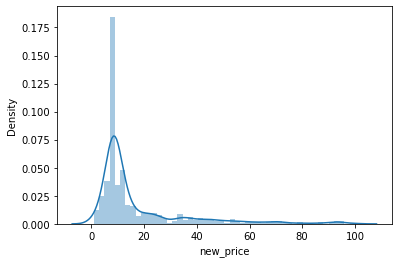

In [30]:
sns.distplot(df.new_price)

In [27]:
tbl=df.groupby(['Location','Transmission'])['new_price'].mean().reset_index()

In [28]:
tbl

,Location,Transmission,new_price
0,Ahmedabad,Automatic,15.546695
1,Ahmedabad,Manual,13.004179
2,Bangalore,Automatic,20.591320
3,Bangalore,Manual,19.365429
4,Chennai,Automatic,17.387753
5,Chennai,Manual,15.697309
6,Coimbatore,Automatic,20.785024
7,Coimbatore,Manual,19.113639
8,Delhi,Automatic,17.711590
9,Delhi,Manual,14.673329


In [29]:
for a,b,c in zip(tbl.Location,tbl.Transmission,tbl.new_price):
    df.loc[(df.Location==a) & (df.Transmission==b) & (df.new_price.isnull()),'new_price']=c

<AxesSubplot:xlabel='new_price', ylabel='Density'>

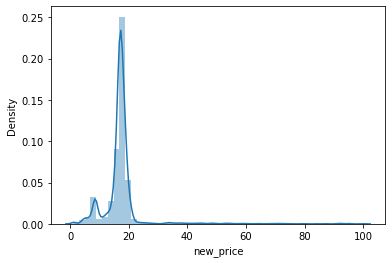

In [30]:
sns.distplot(df.new_price)

In [31]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                  338
Price                52500
Mileage_num            341
engine_cc              106
power_bhp             2633
new_price                0
brand                    0
dtype: int64

In [36]:
model=sfa.ols('power_bhp~Location+Fuel_Type+Transmission+brand',data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Location,10.0,6.611467e+06,6.611467e+05,164.591476,0.000000e+00
Fuel_Type,4.0,5.631186e+05,1.407796e+05,35.046878,2.748750e-29
Transmission,1.0,3.815903e+06,3.815903e+06,949.963138,2.996260e-207
brand,27.0,3.100408e+05,1.148299e+04,2.858673,1.010995e-06
Residual,72324.0,2.905179e+08,4.016895e+03,NaN,NaN


<AxesSubplot:xlabel='power_bhp', ylabel='Density'>

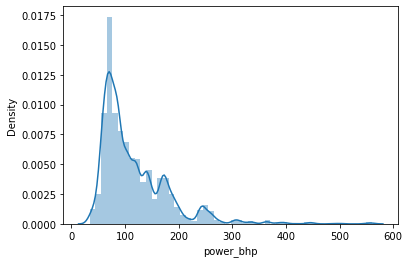

In [37]:
sns.distplot(df.power_bhp)

In [32]:
tbl=df.groupby(['Location','Fuel_Type','Transmission','brand'])['power_bhp'].mean().reset_index()
tbl

,Location,Fuel_Type,Transmission,brand,power_bhp
0,Ahmedabad,CNG,Automatic,Audi,164.050000
1,Ahmedabad,CNG,Automatic,Hyundai,58.200000
2,Ahmedabad,CNG,Automatic,Maruti,218.000000
3,Ahmedabad,CNG,Automatic,Mercedes-Benz,86.716667
4,Ahmedabad,CNG,Automatic,Mitsubishi,112.200000
...,...,...,...,...,...
1564,Pune,Petrol,Manual,Skoda,91.603571
1565,Pune,Petrol,Manual,Tata,108.082353
1566,Pune,Petrol,Manual,Toyota,109.010000
1567,Pune,Petrol,Manual,Volkswagen,97.561429


In [33]:
for a,b,c,d,e in zip(tbl.Location,tbl.Fuel_Type,tbl.Transmission,tbl.brand,tbl.power_bhp):
    df.loc[(df.Location==a) & (df.Fuel_Type==b) & (df.Transmission==c) & (df.brand==d) & (df.power_bhp.isnull()),'power_bhp']=e

In [34]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                  338
Price                52500
Mileage_num            341
engine_cc              106
power_bhp               14
new_price                0
brand                    0
dtype: int64

In [35]:
df.power_bhp=df.power_bhp.fillna(df.power_bhp.median())

In [34]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                  338
Price                52500
Mileage_num            341
engine_cc              106
power_bhp                0
new_price                0
brand                    0
dtype: int64

In [43]:
model=sfa.ols('Seats~Location+Fuel_Type+Transmission+brand',data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Location,10.0,1496.252901,149.625290,225.725853,0.000000e+00
Fuel_Type,4.0,2242.142699,560.535675,845.628392,0.000000e+00
Transmission,1.0,424.895798,424.895798,641.001039,7.989745e-141
brand,27.0,44.263119,1.639375,2.473173,3.214139e-05
Residual,74619.0,49462.165568,0.662863,NaN,NaN


In [36]:
tbl=df.groupby(['Location','Fuel_Type','Transmission','brand'])['Seats'].median().reset_index()
tbl

,Location,Fuel_Type,Transmission,brand,Seats
0,Ahmedabad,CNG,Automatic,Audi,5.0
1,Ahmedabad,CNG,Automatic,Hyundai,5.0
2,Ahmedabad,CNG,Automatic,Maruti,5.0
3,Ahmedabad,CNG,Automatic,Mercedes-Benz,5.0
4,Ahmedabad,CNG,Automatic,Mitsubishi,5.0
...,...,...,...,...,...
1564,Pune,Petrol,Manual,Skoda,5.0
1565,Pune,Petrol,Manual,Tata,5.0
1566,Pune,Petrol,Manual,Toyota,5.0
1567,Pune,Petrol,Manual,Volkswagen,5.0


In [37]:
for a,b,c,d,e in zip(tbl.Location,tbl.Fuel_Type,tbl.Transmission,tbl.brand,tbl.Seats):
    df.loc[(df.Location==a) & (df.Fuel_Type==b) & (df.Transmission==c) & (df.brand==d) & (df.Seats.isnull()),'Seats']=e

In [38]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    1
Price                52500
Mileage_num            341
engine_cc              106
power_bhp                0
new_price                0
brand                    0
dtype: int64

In [39]:
df.Seats=df.Seats.fillna(df.Seats.median())

In [40]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
Price                52500
Mileage_num            341
engine_cc              106
power_bhp                0
new_price                0
brand                    0
dtype: int64

In [49]:
model=sfa.ols('Mileage_num~Location+Fuel_Type+Transmission+brand',data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Location,10.0,1.432814e+04,1432.814130,57.062244,9.916563e-116
Fuel_Type,4.0,5.998436e+03,1499.608905,59.722365,1.941274e-50
Transmission,1.0,3.465463e+02,346.546253,13.801306,2.033430e-04
brand,27.0,9.035121e+03,334.634106,13.326902,1.031807e-59
Residual,74616.0,1.873583e+06,25.109670,NaN,NaN


<AxesSubplot:xlabel='Mileage_num', ylabel='Density'>

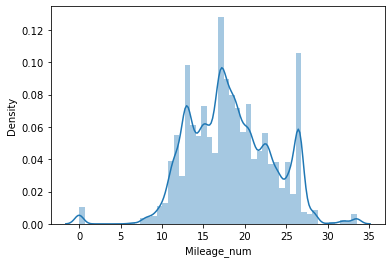

In [50]:
sns.distplot(df.Mileage_num)

In [41]:
tbl=df.groupby(['Location','Fuel_Type','Transmission','brand'])['Mileage_num'].mean().reset_index()
tbl

,Location,Fuel_Type,Transmission,brand,Mileage_num
0,Ahmedabad,CNG,Automatic,Audi,16.930000
1,Ahmedabad,CNG,Automatic,Hyundai,24.000000
2,Ahmedabad,CNG,Automatic,Maruti,15.100000
3,Ahmedabad,CNG,Automatic,Mercedes-Benz,15.333333
4,Ahmedabad,CNG,Automatic,Mitsubishi,23.900000
...,...,...,...,...,...
1564,Pune,Petrol,Manual,Skoda,17.238667
1565,Pune,Petrol,Manual,Tata,18.038333
1566,Pune,Petrol,Manual,Toyota,17.872353
1567,Pune,Petrol,Manual,Volkswagen,19.297826


In [42]:
for a,b,c,d,e in zip(tbl.Location,tbl.Fuel_Type,tbl.Transmission,tbl.brand,tbl.Mileage_num):
    df.loc[(df.Location==a) & (df.Fuel_Type==b) & (df.Transmission==c) & (df.brand==d) & (df.Mileage_num.isnull()),'Mileage_num']=e

In [43]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
Price                52500
Mileage_num              0
engine_cc              106
power_bhp                0
new_price                0
brand                    0
dtype: int64

In [54]:
model=sfa.ols('engine_cc~Location+Fuel_Type+Transmission+brand',data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Location,10.0,1.383816e+09,1.383816e+08,336.608580,0.000000
Fuel_Type,4.0,8.185997e+08,2.046499e+08,497.803908,0.000000
Transmission,1.0,6.338318e+08,6.338318e+08,1541.774000,0.000000
brand,27.0,2.912180e+07,1.078585e+06,2.623621,0.000009
Residual,74851.0,3.077166e+10,4.111055e+05,NaN,NaN


<AxesSubplot:xlabel='engine_cc', ylabel='Density'>

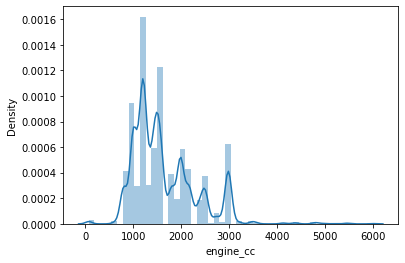

In [55]:
sns.distplot(df.engine_cc)

In [44]:
tbl=df.groupby(['Location','Fuel_Type','Transmission','brand'])['engine_cc'].mean().reset_index()
tbl

,Location,Fuel_Type,Transmission,brand,engine_cc
0,Ahmedabad,CNG,Automatic,Audi,1692.500000
1,Ahmedabad,CNG,Automatic,Hyundai,1248.000000
2,Ahmedabad,CNG,Automatic,Maruti,1396.000000
3,Ahmedabad,CNG,Automatic,Mercedes-Benz,1564.333333
4,Ahmedabad,CNG,Automatic,Mitsubishi,1598.000000
...,...,...,...,...,...
1564,Pune,Petrol,Manual,Skoda,1614.692308
1565,Pune,Petrol,Manual,Tata,1544.000000
1566,Pune,Petrol,Manual,Toyota,1527.843137
1567,Pune,Petrol,Manual,Volkswagen,1523.304348


In [45]:
for a,b,c,d,e in zip(tbl.Location,tbl.Fuel_Type,tbl.Transmission,tbl.brand,tbl.engine_cc):
    df.loc[(df.Location==a) & (df.Fuel_Type==b) & (df.Transmission==c) & (df.brand==d) & (df.engine_cc.isnull()),'engine_cc']=e

In [46]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
Price                52500
Mileage_num              0
engine_cc                1
power_bhp                0
new_price                0
brand                    0
dtype: int64

In [47]:
df.engine_cc=df.engine_cc.fillna(df.engine_cc.mean())

In [48]:
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
Price                52500
Mileage_num              0
engine_cc                0
power_bhp                0
new_price                0
brand                    0
dtype: int64

In [79]:
df_temp=df.copy()

In [80]:
df_temp

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_num,engine_cc,power_bhp,new_price,brand
0,Bangalore,2012,33715,Diesel,Manual,First,5.0,25.53,16.46,1248.0,100.00000,43.650000,Maruti
1,Delhi,2013,73977,Diesel,Manual,First,4.0,4.58,18.60,2993.0,61.00000,14.673329,Honda
2,Delhi,2007,16460,CNG,Manual,Third,5.0,2.37,15.30,1599.0,140.00000,14.673329,Honda
3,Kolkata,2009,35048,Petrol,Manual,First,5.0,1.20,25.47,1196.0,86.80000,16.907164,Skoda
4,Coimbatore,2013,41656,Petrol,Automatic,First,7.0,33.04,19.12,1999.0,115.00000,13.260000,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,Kolkata,2014,59533,Diesel,Manual,First,8.0,NaN,16.09,1248.0,109.30678,16.907164,Honda
74996,Kochi,2017,56122,Diesel,Manual,First,5.0,NaN,12.60,1591.0,85.80000,1.360000,Toyota
74997,Hyderabad,2012,57365,Diesel,Manual,First,5.0,NaN,22.00,2993.0,174.30000,10.040000,Maruti
74998,Hyderabad,2012,33307,Diesel,Manual,First,5.0,NaN,10.98,1995.0,112.00000,17.310909,Toyota


In [81]:
df_temp['vintage']=2022-df_temp.Year

In [82]:
df_temp.drop(columns='Year',inplace=True)

In [83]:
df_temp

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_num,engine_cc,power_bhp,new_price,brand,vintage
0,Bangalore,33715,Diesel,Manual,First,5.0,25.53,16.46,1248.0,100.00000,43.650000,Maruti,10
1,Delhi,73977,Diesel,Manual,First,4.0,4.58,18.60,2993.0,61.00000,14.673329,Honda,9
2,Delhi,16460,CNG,Manual,Third,5.0,2.37,15.30,1599.0,140.00000,14.673329,Honda,15
3,Kolkata,35048,Petrol,Manual,First,5.0,1.20,25.47,1196.0,86.80000,16.907164,Skoda,13
4,Coimbatore,41656,Petrol,Automatic,First,7.0,33.04,19.12,1999.0,115.00000,13.260000,Hyundai,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,Kolkata,59533,Diesel,Manual,First,8.0,NaN,16.09,1248.0,109.30678,16.907164,Honda,8
74996,Kochi,56122,Diesel,Manual,First,5.0,NaN,12.60,1591.0,85.80000,1.360000,Toyota,5
74997,Hyderabad,57365,Diesel,Manual,First,5.0,NaN,22.00,2993.0,174.30000,10.040000,Maruti,10
74998,Hyderabad,33307,Diesel,Manual,First,5.0,NaN,10.98,1995.0,112.00000,17.310909,Toyota,10


In [84]:
df_temp.Location.unique()

array(['Bangalore', 'Delhi', 'Kolkata', 'Coimbatore', 'Pune', 'Hyderabad',
       'Mumbai', 'Kochi', 'Chennai', 'Jaipur', 'Ahmedabad'], dtype=object)

In [85]:
north=['Delhi']

south=['Bangalore','Coimbatore','Hyderabad','Kochi','Chennai']

east=['Kolkata']

west=['Pune','Mumbai','Jaipur','Ahmedabad']

In [86]:
def location_bin(x):
    if x in north:
        return 'North'
    elif x in south:
        return 'South'
    elif x in east:
        return 'East'
    elif x in west:
        return 'West'

In [87]:
df_temp.Location=df_temp.Location.apply(location_bin)

In [88]:
df_temp

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_num,engine_cc,power_bhp,new_price,brand,vintage
0,South,33715,Diesel,Manual,First,5.0,25.53,16.46,1248.0,100.00000,43.650000,Maruti,10
1,North,73977,Diesel,Manual,First,4.0,4.58,18.60,2993.0,61.00000,14.673329,Honda,9
2,North,16460,CNG,Manual,Third,5.0,2.37,15.30,1599.0,140.00000,14.673329,Honda,15
3,East,35048,Petrol,Manual,First,5.0,1.20,25.47,1196.0,86.80000,16.907164,Skoda,13
4,South,41656,Petrol,Automatic,First,7.0,33.04,19.12,1999.0,115.00000,13.260000,Hyundai,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,East,59533,Diesel,Manual,First,8.0,NaN,16.09,1248.0,109.30678,16.907164,Honda,8
74996,South,56122,Diesel,Manual,First,5.0,NaN,12.60,1591.0,85.80000,1.360000,Toyota,5
74997,South,57365,Diesel,Manual,First,5.0,NaN,22.00,2993.0,174.30000,10.040000,Maruti,10
74998,South,33307,Diesel,Manual,First,5.0,NaN,10.98,1995.0,112.00000,17.310909,Toyota,10


In [100]:
df_temp.loc[df.Mileage_num==0,'Mileage_num']=df.Mileage_num.mean()

In [112]:
df_temp['lifetime_fuel_consumption']=df_temp.Kilometers_Driven/df_temp.Mileage_num

<AxesSubplot:xlabel='lifetime_fuel_consumption', ylabel='Density'>

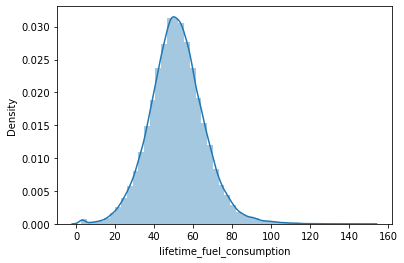

In [113]:
sns.distplot(np.sqrt(df_temp.lifetime_fuel_consumption))

In [114]:
df_temp.lifetime_fuel_consumption=np.sqrt(df_temp.lifetime_fuel_consumption)

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

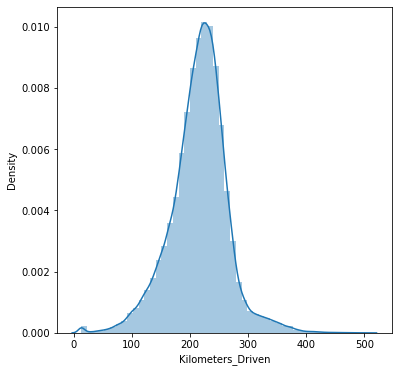

In [73]:
plt.rcParams['figure.figsize']=[6,6]
sns.distplot(np.sqrt(df_temp.Kilometers_Driven))

In [115]:
df_temp.Kilometers_Driven=np.sqrt(df.Kilometers_Driven)

<AxesSubplot:xlabel='engine_cc', ylabel='Density'>

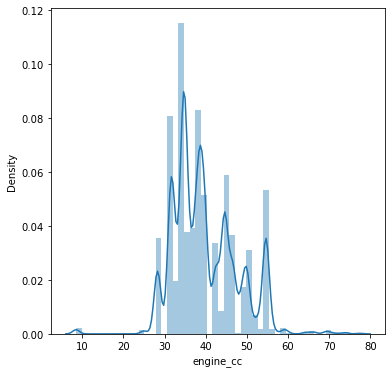

In [75]:
sns.distplot(np.sqrt(df_temp.engine_cc))

In [116]:
df_temp.engine_cc=np.sqrt(df_temp.engine_cc)

<AxesSubplot:xlabel='power_bhp', ylabel='Density'>

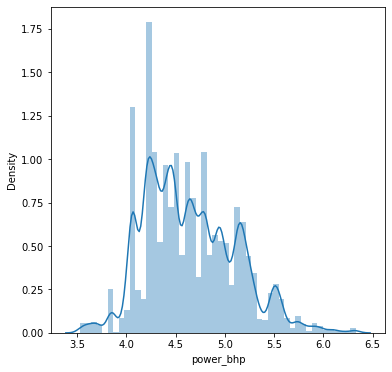

In [77]:
sns.distplot(np.log(df_temp.power_bhp))

In [117]:
df_temp.power_bhp=np.log(df_temp.power_bhp)

<AxesSubplot:xlabel='new_price', ylabel='Density'>

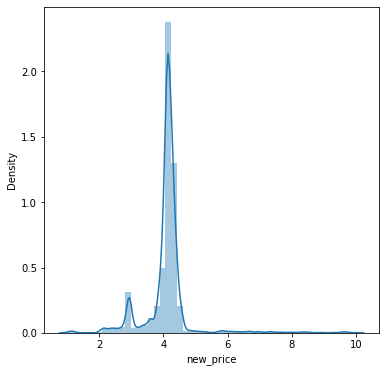

In [79]:
sns.distplot(np.sqrt(df_temp.new_price))

In [118]:
df_temp.new_price=np.sqrt(df_temp.new_price)

<AxesSubplot:xlabel='vintage', ylabel='Density'>

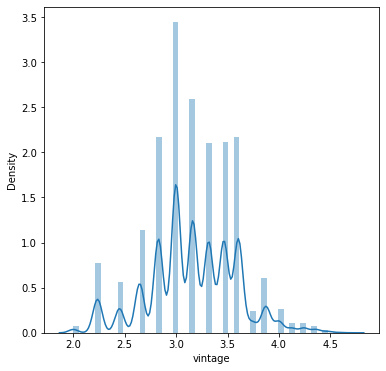

In [81]:
sns.distplot(np.sqrt(df_temp.vintage))

In [119]:
df_temp.vintage=np.sqrt(df_temp.vintage)

In [120]:
brand_map=df_temp.groupby('brand')['Price'].mean()

In [121]:
df_temp.brand=df_temp.brand.map(brand_map)

In [122]:
df_temp.brand=df_temp.brand.fillna(df_temp.brand.mean())

In [123]:
df_temp.isnull().sum()

Location                         0
Kilometers_Driven                0
Fuel_Type                        0
Transmission                     0
Owner_Type                       0
Seats                            0
Price                        52500
Mileage_num                      0
engine_cc                        0
power_bhp                        0
new_price                        0
brand                            0
vintage                          0
lifetime_fuel_consumption        0
dtype: int64

In [124]:
df_temp

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_num,engine_cc,power_bhp,new_price,brand,vintage,lifetime_fuel_consumption
0,South,183.616448,Diesel,Manual,First,5.0,25.53,16.46,35.327043,4.605170,6.606815,6.333582,3.162278,45.258136
1,North,271.987132,Diesel,Manual,First,4.0,4.58,18.60,54.708317,4.110874,3.830578,6.292346,3.000000,63.065506
2,North,128.296532,CNG,Manual,Third,5.0,2.37,15.30,39.987498,4.941642,3.830578,6.292346,3.872983,32.799649
3,East,187.211111,Petrol,Manual,First,5.0,1.20,25.47,34.583233,4.463607,4.111832,6.454060,3.605551,37.095151
4,South,204.098016,Petrol,Automatic,First,7.0,33.04,19.12,44.710178,4.744932,3.641428,6.234188,3.000000,46.676130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,East,243.993852,Diesel,Manual,First,8.0,NaN,16.09,35.327043,4.694158,4.111832,6.292346,2.828427,60.827625
74996,South,236.900823,Diesel,Manual,First,5.0,NaN,12.60,39.887341,4.452019,1.166190,6.478157,2.236068,66.739246
74997,South,239.509916,Diesel,Manual,First,5.0,NaN,22.00,54.708317,5.160778,3.168596,6.333582,3.162278,51.063686
74998,South,182.502055,Diesel,Manual,First,5.0,NaN,10.98,44.665423,4.718499,4.160638,6.478157,3.162278,55.076532


# Modelling

In [125]:
dummy=pd.get_dummies(df_temp,drop_first=True)

In [126]:
train.shape,test.shape

((22500, 13), (52500, 12))

In [127]:
newtrain=dummy.iloc[:train.shape[0]]
newtest=dummy.iloc[train.shape[0]:]

In [128]:
newtrain.shape,newtest.shape

((22500, 21), (52500, 21))

In [129]:
x_train=newtrain.drop(columns='Price')
y_train=newtrain.Price
x_test=newtest.drop(columns='Price')

In [130]:
x_test=x_test.reset_index().drop(columns='index')

In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.iloc[:,:9]=pd.DataFrame(sc.fit_transform(x_train.iloc[:,:9]),columns=x_train.iloc[:,:9].columns)

In [133]:
x_test.iloc[:,:9]=pd.DataFrame(sc.transform(x_test.iloc[:,:9]),columns=x_test.iloc[:,:9].columns)

In [134]:
x_train

,Kilometers_Driven,Seats,Mileage_num,engine_cc,power_bhp,new_price,brand,vintage,lifetime_fuel_consumption,Location_North,Location_South,Location_West,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-0.649943,-0.417052,-0.417524,-0.553059,-0.081354,3.351987,-0.062794,-0.001444,-0.453983,0,1,0,1,0,0,0,1,0,0,0
1,1.126391,-1.605310,0.028080,1.905590,-1.140901,-0.355404,-0.164039,-0.387402,0.805379,1,0,0,1,0,0,0,1,0,0,0
2,-1.761925,-0.417052,-0.659066,0.038152,0.639891,-0.355404,-0.164039,1.688884,-1.335065,1,0,0,0,0,0,0,1,0,0,1
3,-0.577687,-0.417052,1.458591,-0.647416,-0.384802,0.020183,0.233008,1.052829,-1.031281,0,0,0,0,0,0,1,1,0,0,0
4,-0.238244,1.959464,0.136357,0.637257,0.218233,-0.607995,-0.306830,-0.387402,-0.353701,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,-0.337942,-0.417052,0.548644,-0.342547,-0.068531,0.234649,0.292171,1.052829,-0.588759,0,0,1,0,0,0,0,1,0,1,0
22496,-0.330782,-0.417052,3.118151,-0.645582,-0.050541,0.234649,0.332357,-0.001444,-1.214935,0,0,1,0,0,0,1,1,0,0,0
22497,0.152013,-0.417052,1.612678,-0.464167,-1.243097,-0.014353,0.292171,0.365652,-0.567110,0,0,1,1,0,0,0,1,0,0,0
22498,-0.345014,-0.417052,-0.138501,-0.643749,-0.698014,0.234649,-0.062794,-0.795467,-0.322530,0,0,1,0,0,0,1,1,0,0,0


In [135]:
x_test

,Kilometers_Driven,Seats,Mileage_num,engine_cc,power_bhp,new_price,brand,vintage,lifetime_fuel_consumption,Location_North,Location_South,Location_West,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.105457,1.959464,-0.138501,-0.553059,1.950278,0.149292,-1.401077,0.716408,0.053126,1,0,0,1,0,0,0,0,0,0,0
1,0.036771,-0.417052,1.131676,1.305770,1.214026,-2.691973,-0.062794,0.365652,-0.504276,0,0,1,1,0,0,0,0,0,0,0
2,-0.918684,-0.417052,0.234223,1.300692,1.436355,5.793410,-0.306830,-0.795467,-0.934427,0,1,0,0,0,0,1,0,0,0,0
3,0.004671,-0.417052,1.131676,-0.124668,1.559463,0.185602,2.338489,-2.204322,-0.527377,0,1,0,0,0,0,1,1,0,0,0
4,-1.499881,1.959464,1.693886,1.905590,0.756109,0.123240,-0.062794,-1.229940,-1.716704,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0.563700,3.147722,-0.494567,-0.553059,0.109397,0.020183,-0.164039,-0.795467,0.647113,0,0,0,1,0,0,0,1,0,0,0
52496,0.421123,-0.417052,-1.221275,0.025447,-0.409640,-3.913432,0.292171,-2.204322,1.065191,0,1,0,1,0,0,0,1,0,0,0
52497,0.473569,-0.417052,0.736047,1.905590,1.109618,-1.239416,-0.062794,-0.001444,-0.043407,0,1,0,1,0,0,0,1,0,0,0
52498,-0.672343,-0.417052,-1.558601,0.631580,0.161572,0.085359,0.292171,-0.001444,0.240388,0,1,0,1,0,0,0,1,0,0,0


In [ ]:
lgbm=LGBMRegressor(boosting_type= 'dart',learning_rate= 0.1,n_estimators= 1300,num_leaves= 10,max_depth=4)

In [253]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(boosting_type= 'dart',learning_rate= 0.1,n_estimators= 1300,num_leaves=10,max_depth=4)
model=lgbm.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [254]:
sub=pd.DataFrame({'Name':test.Name,'Price':y_pred})

In [255]:
sub.to_csv('Submission_lgbm.csv',index=False)

In [256]:
sub

,Name,Price
0,Ford Figo Diesel Titanium,21.023700
1,Maruti SX4 VDI,14.590125
2,Hyundai Creta 1.6 SX Option,12.649127
3,Jeep Compass 2.0 Limited 4X4,4.447154
4,Maruti Swift Dzire VDI,11.821010
...,...,...
52495,Honda Mobilio S i DTEC,9.213013
52496,Toyota Etios Liva 1.2 G,4.160414
52497,Maruti Zen LX,10.074648
52498,Toyota Innova 2.5 VX (Diesel) 7 Seater,10.097977
